In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


from pandas import *

0
3


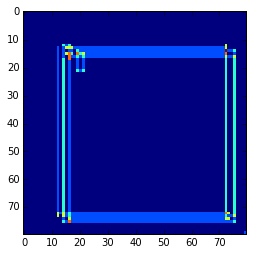

In [2]:
xDim=80 #size of area to create
yDim=80 
Lifespan=1024
trial=0 #0-2 
dataList=[]
numTrials=3 #always three replicates

import csv
Fname="data/dominant.csv" #assign csv file to a variable
with open(Fname, "r") as fp: #open final, becomes variable fp, will close file automatically
    data=csv.reader(fp,delimiter=",",quotechar='"') #reads everything in file and writes it into 'data' 
    for row in data:
        dataList.append(row) #this makes each row of data a segment of the list

dataList=dataList[-1] #-1 means start from end of list instead of beginning, means dataList now only has last row- that's one we want
allxLocs=dataList[8].strip("[]").split(",") #this strips away brackets and splits it by commas (the 8th term- xLocs)
allyLocs=dataList[9].strip("[]").split(",")

trialXLocs=[]
trialYLocs=[]

for t in range(0,numTrials): #this puts each replicates steps as a separate element in a list
    trialXLocs.append(allxLocs[t*Lifespan:(t+1)*Lifespan])
    trialYLocs.append(allyLocs[t*Lifespan:(t+1)*Lifespan])

print len(trialYLocs[2])
print len(trialXLocs)

area=list()
for x in range(xDim):
    area.append(list())
    for y in range(yDim):
        area[x].append(0)
#print area

for j in range(Lifespan):
    xCor=int(trialXLocs[trial][j])
    yCor=int(trialYLocs[trial][j])
    area[xCor][yCor]=area[xCor][yCor]+1
imshow(area, interpolation="nearest")

[5618, 575, 181, 18, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


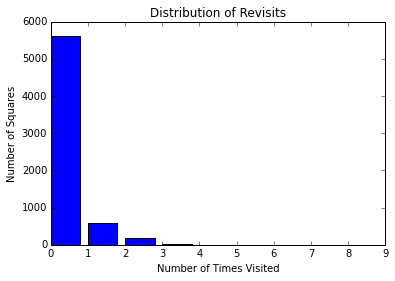

In [3]:
numTimesRepeated=[]
for i in range(50):
    numTimesRepeated.append(0)
#print numTimesRepeated

for i in range(xDim):
    for j in range(yDim):
        numTimes=area[i][j]
        numTimesRepeated[numTimes]=numTimesRepeated[numTimes]+1
print numTimesRepeated        
bar([0,1,2,3,4,5,6,7,8],[numTimesRepeated[0],numTimesRepeated[1],numTimesRepeated[2],numTimesRepeated[3],numTimesRepeated[4],numTimesRepeated[5],numTimesRepeated[6],numTimesRepeated[7],numTimesRepeated[8]])
xlabel("Number of Times Visited")
ylabel("Number of Squares")
title("Distribution of Revisits")